# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**In a given , trial the position of the smartcab and the destination is fixed at all points, till the trial is complete.

The driving agent is receiving positive rewards for staying idle at red light,yellow light. The magnitue of reward is higher in red than in yellow. The driving agent is given negative rewards for staying idle during green light , when there is no incoming traffic.

There are two lines, the first line gives the magnitude and sign of the rewards, with green being a positive reward, which occurs on two occasions.The first when the agent is idle at a red light, in that case both the lines are green.The second, when, the agent is idle at yellow light, where the top line is green because the reward is positive and the second line is yellow indicating the color of the traffic light or presence of oncoming traffic.The color of both the line changes to red during a negative reward, the magnitude of the negative rewards are higher than the positive rewards and the sign is negative.The red light is displayed when the agent fails to move during a green light, with no oncoming traffic.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**The three flags, that were chosen were 1.num_dummies- it changed the no of obstacles or background cars to the number it was assigned,2.grid_size= it changed the dimensions of the game or road, the no of lanes or grids were changed according to the tuple(columns,rows).3.enforce_deadline=True, when this flag is applied, the timer starts to decrease in % points after every update , whose default value is set to 2 seconds, so, the time to reach the destination starts from 100% and ends at 0%.

In the environment.py file 'act' function is called from the Environment class when an agent performs an action.

In simulator.py python file, 'render_text', prints the details of every step and action , rewards,state , step no in the terminal from where the command to launch the simulation was given,i.e the non GUI section. Whereas, 'render' prints the same things like rewards, action, state, giving colors in the GUI section or the pygame window.

In the planner.py file, 'next_waypoint()'  will consider the East-West direction before the North-South direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


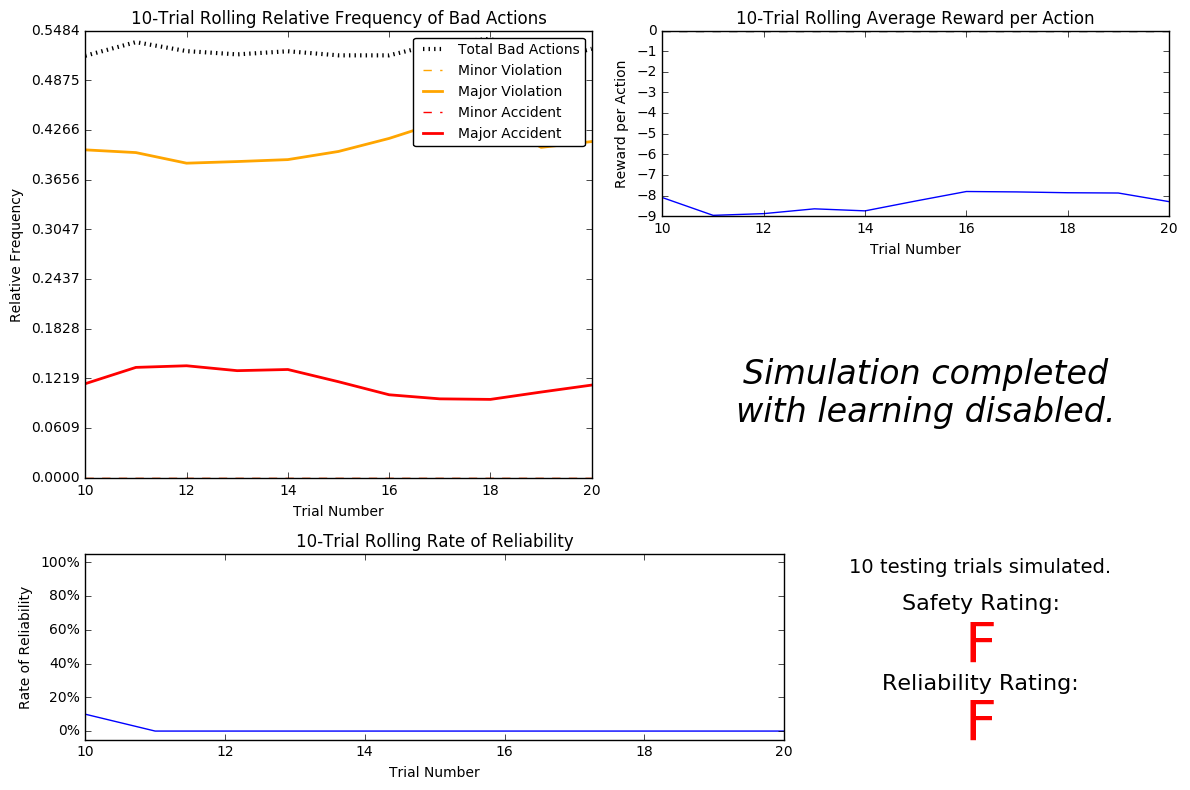

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**The driving agent is making total bad decisions on slightly more than half of the occasions, as in the graph ,the value of total bad decisions fluctuates between 0.49 and 0.54.Out of those total bad decisions ,accidents contribute in the range of 0.09 to 0.15.So one can say, that 0.09 to 0.15 of all decisions are causing major accidents or 0.09 to 0.15 out of 0.49 to 0.54 bad decisons are major accidents.

The rate of reliability does make sense because unlike other driving options of 'left','right','forward', the random movements can sometime lead to the desired target on time. however low  is the probability of reaching the target on time, but there is still a better chance than the other options that some random turns can maneuver the car towards the target.

The agent is receivng heavy negative rewards for making bad decisions, and the positive rewards for the correct decisions are comparatively much lower in magnitude.for the dynamic actions ,i.e when the agent moves , left,right or forward the agent receives the follows  actions.
positive reward, for moving in the waypoint direction
positive reward ,for moving , but not in the waypoint direction
heavy negative reward, for moving in red lights with no traffic
very heavy negative reward ,for moving in red lights with no traffic
mid heavy negative reward, for moving in traffic right or left of way
the rewards clearly suggest that it has been penalized heavily
for static actions when the car is halted, it gets a postive reward for standing still in red light, and gets a negative reward for standing still in green light with no oncoming traffic and a slightly positive reward for standing still in green light with oncoming traffic.

As, the no of trials increase, there is no significant change in the decision making of the driving agent, since it is not learning from its mistakes or past experiences, as the learning attribute has been turned off.So, the outcome of the results don't change significantly.

This smartcab is highly unsafe and highly unreliable for passengers, because it is moving nonchalantly in either one particular direction or making just one particular decision, irrespective of its enviornment and the obstacles around it, it has a very high failure rate , where it makes bad decisons around 50% of the time, and around 10-12% of all decisions it takes, lead to major accidents, and its reliability is around 0% as it fails to reach the target in estimated time on almost all the occasions, unless, by luck , the trajectory of the



-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**light, oncoming,left, right, waypoint are the most important features for safety and reliability.The inputs like light ,left ,right, oncoming help the agent to learn when to move and stop for a particular situation.waypoint tells the agent the direction in which it must head to reach its goal.Deadline comes least in the priority because waypoint already helps the agent to move towards the goal, and safety is more of a concern even if the reliability is compromised by some amount

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**Using the features mentioned above, the size of the state space would be 384 as ,for eg. waypoint could be, agent heading in correct direction or not which makes it have 3 possible values left,right,forward,input['lights'] could be red or green,input['left'] could have 4 values like None,forward,left,right.Similarly input['right'] could have 4 possible values like None,left,right,straight.input['oncoming'] could have 4 possible values , left,right,None,forward.

The driving agent  could learn the policy for each possible state within a reasonable number of training trials, one could increase the no of obstacles to put it in such situations, where it comes across such situations often , which would require it to learn safety,etc

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

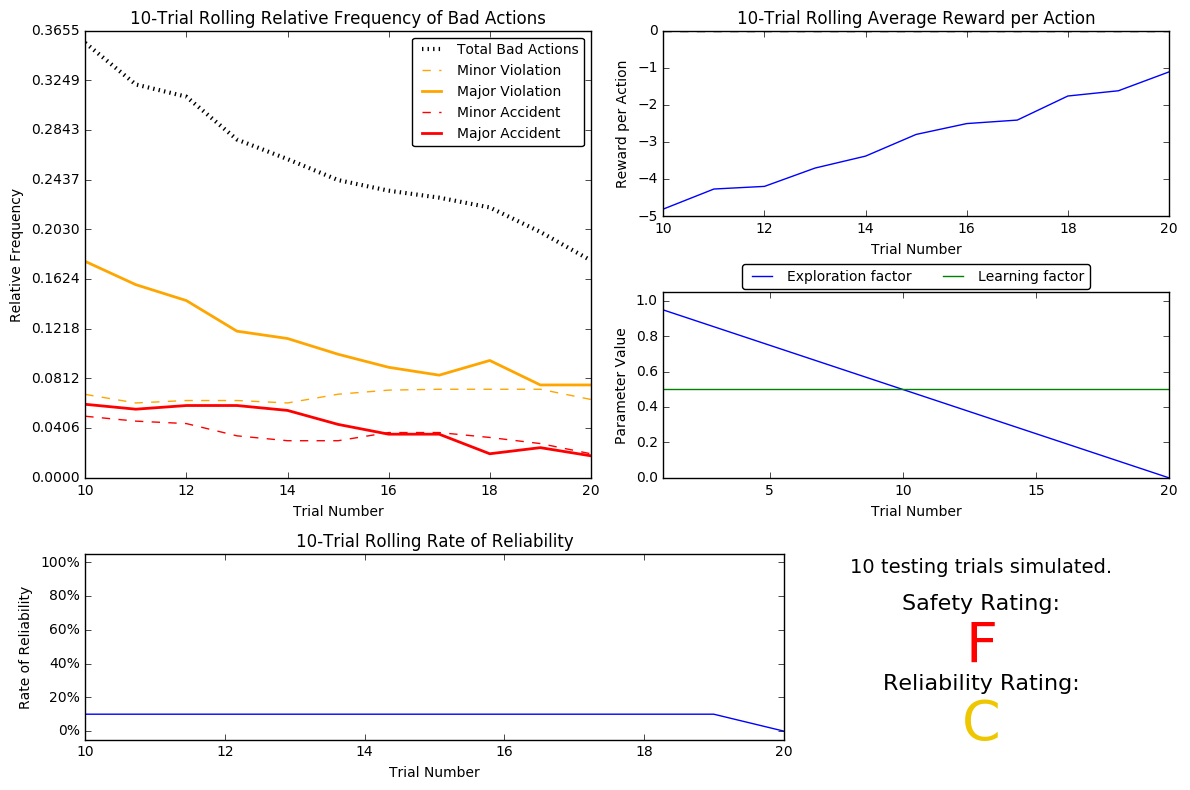

In [8]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**The only thing slightly similar between the basic driving agent and the default Qleaning agent is that both are unsafe and cause a lot of accidents and their safety rating is F.

The agent took 20 training trials before testing.The no does make sense as the default value of epsilon starts from 1.0 and since the decay is set to 0.05 and given the default tolerance level to be 0.05,i.e after reaching epsilon of 0.05, the next decay would lead it into the testing phase.So,when one includes the upper and lower limits in their calculations, the first trial happens at epsilon =1.0 and reduces by 0.05 after every iteration and the last trial happens at 0.05.So, the backward counting from 10 to 0.05 leads to 20 training trials.

In the parameter panel, the slope of the exploartion factor would determine the decay function given of -0.05.However, the slope is slighlty off the mark as the line doesn't touch the 1.0 mark at the y axis, so the decay shown in parameter panel is slightly less in magnitude than the input decay function.

As the no of training trials increased, a trend in the graph is noticeable, that the no of bad actions is falling with increasing no of trials , as the Q learning agent is coming across newer situations and learning from its previous mistakes, also the rewards which was heavily negative at the start,becomes lesser in magnitude with increasing no of trials.So, the average reward increased and no of bad actions decreased.

The safety rating is still F and the reliability has improved slightly to a rating of C from F in the initial driving agent case.Although, with increasing no of trials, the graph shows a decline in no of major and minor accidents and total bad actions in general, it still isn't good enough, and also the realiability is better slightly hpvering around 10% mark for most of the training trials.With a rating of C , it must have reached the destination on 7 out of 10 testing trials



-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

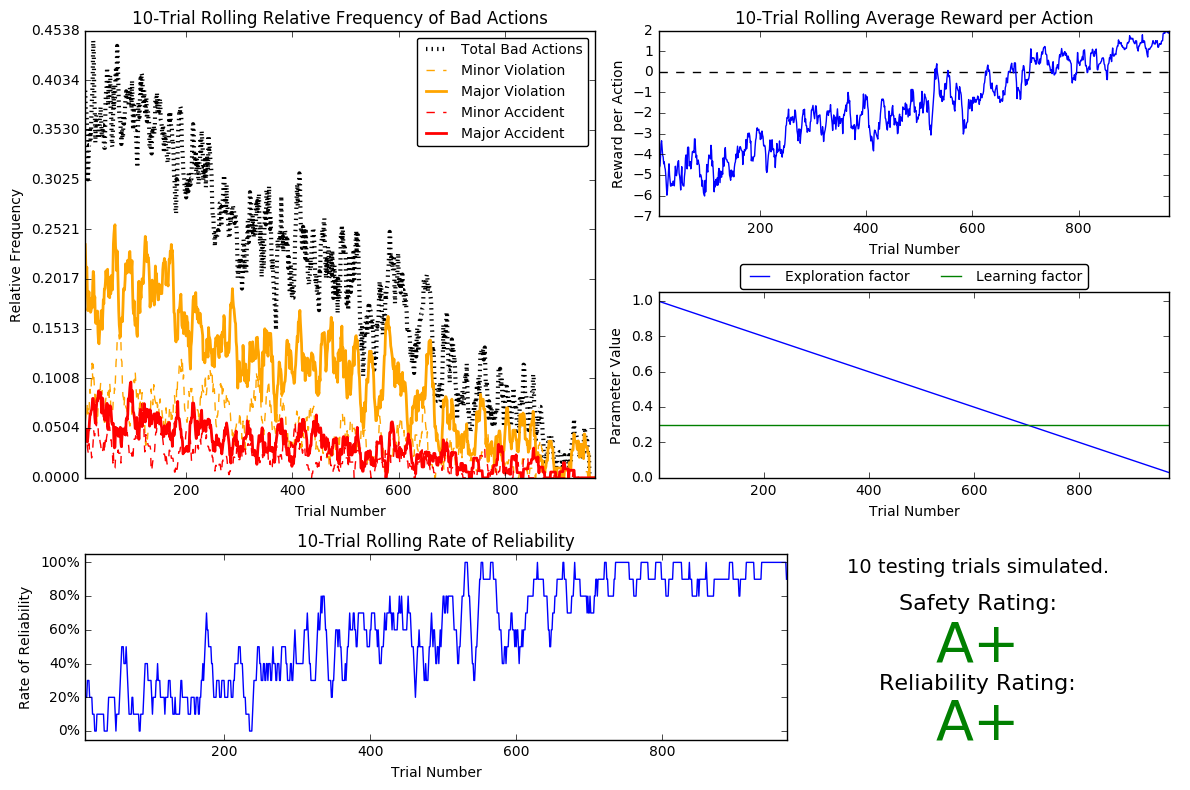

In [9]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**The decaying function used was a linear function with a value of -0.001, so the no of training trials were larger than before, even the epsilon tolerance was reduced to accomodate more training trials.The epsilon or exploration factor was set to epsilon= epsilon -0.001.

The agent trained for 970 trials before the testing began.

The epsilon tolerance was set to 0.03, lower than 0.05 which was the default value, to accomodate more training trials, i found decay and tolerance as the 2 parameters to be tuned to accomodate more training trials and the graph shows that somewhere around the 900 trials mark, the agent really started doing well as its rewards per trials were very positive and on a consistent basis from that mark onwards.The alpha chosen was 0.3 which is again lower than the default value of 0.5, because i had the intution with more no of trials and low learning rate, the agent would adapt to all the scenarios it faces and also not make hard conclusions directly, as it learns slowly, this combination seems like an overfitting scenario in a supervised problem, but seems like a better combination in a reinforcement learning situation.

The Q learning agent has improved drastically after the changes were made with the parameter tunings, as the ratings suggest and the graph supports, the safety and relaibility ratings have improved to A+ ,indicating that in the testing trials, the Q learning agent always chooses the correct action, commits no violation and reaches the destination on time in 100% of the trials.The previous trials ended with rewards per trial in the negative 1 to 2 range, whereas the improved Q learning  trials finished with rewards per action in he positive 1 to 2 range.The total no of bad actions in the previous trials ended around 0.18 of the total decisions taken, whereas the improved Q learning agent took  bad decisions,in the ending trials.

The Q learner results indicate that the Q learning agent has learned the correct actions to be taken in all the possible 384 states, given to it and has completed the testing trials within time and with 100% safety.So, the agent has definitely learned the appropriate policies of this world.

The reliability and safety ratings are satisfactory






### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** The states mentioned were waypoint,input[lights], input[left], input[right], input[oncoming].There were 384 possible different states possible. eg for optimal policies
1.waypoint=forward,light=green,left=None,Right=None ,oncoming=left, action=forward
2.waypoint= left,light=green,left=none,right=left,oncoming=right,action=left
3.waypoint=left,light=red,left=forward,right=right,oncoming=None,action=None
4.waypoint=Forward,light=Green,left=Right,right=Forward,oncoming=right, action=Forward
5.waypoint=Right,light=green,left=none,right=forward,oncoming=forward,action=Right
6.waypoint=forward,light=red,left=left,right=left,oncoming=left,action=None

The agent must perform the action =None, when , light =red, when light=green,it has to follow the waypoint, because it is following the traffic rules from its point of view, according to this policy, if the obstacles or other cars follow the signals and lights properly as well, there is no chance of collision.

There is no state where there is deviation from the optimal policy, because the rewards are adjusted as such ,for eg: in case of a red light, irrespective of every other state, the reward for action None will have the highest value.
The rewards for the states in the examples mentioned above are in agreement with the ideal action and the policy in the text file of improved Qlearning algorithm.

('forward', 'green', 'forward', None, 'left')
 -- forward : 1.58
 -- right : 0.51
 -- None : 0.80
 -- left : 0.93
 
 here the forward action has the highest reward as the light for it is green and the waypoint is forward, so following proper traffic rules, this action has the highest reward.
 
 ('right', 'red', 'forward', 'right', 'forward')
 -- forward : -20.66
 -- right : -10.41
 -- None : 0.74
 -- left : 0.00
 
 for any wrong action as you can see,there are heavy negative rewards in store, so it will avoid commiting to actions with a high negative reward, and in the red light, None action has the highest reward, so according to basic traffic rules, if the agent halts on  a red light, moves towards the waypoint direction in green light, this falls for an optimal policy.






-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**Gamma determines how much future reward is valued(closer to 0 means more immediate reward is considered), What might happen is that if future rewards become more important, the agent might also negate the action of None in red lights, and would cause accidents, because then  its primary goal would be to reach the destination on time and would be lured by future rewards instead of focusing on the current state. The agent is better off , following the waypoint and traffic lights , because waypoint would eventually lead it to its destination. However, as presence of future rewards will affect the current rewards, the agent would make bad decisions, and safety might be compromised for reliability.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.